In [9]:
from owslib.wmts import WebMapTileService

# URL of the WMTS service
url = 'https://mapsneu.wien.gv.at/wmtsneu/1.0.0/WMTSCapabilities.xml'

# Connect to the WMTS service
wmts = WebMapTileService(url)

In [10]:
layers = list(wmts.contents)
print(layers)
print(wmts.tilematrixsets)

['fmzk3dviewer', 'lb', 'lb2021', 'lb2020', 'lb2019', 'lb2018', 'lb2017', 'lb2016', 'lb2015', 'lb2014', 'lb1992', 'lb1986', 'lb1981', 'lb1976', 'lb1971mU', 'lb1971', 'lb1961', 'lb1956', 'lb1938', 'fmzk', 'flwbplmzk', 'beschriftung']
{'google3857': <owslib.wmts.TileMatrixSet object at 0x7fd8743a9a90>, 'google3857_0-20': <owslib.wmts.TileMatrixSet object at 0x7fd874275350>, 'google3857_0-21': <owslib.wmts.TileMatrixSet object at 0x7fd8788a0bd0>}


In [11]:
layer = layers[0]
layer_id = 'lb'

In [14]:
# Get the specific layer
layer = wmts.contents[layer_id]

# Get the TileMatrixSetLink for the specific TileMatrixSet
tms_link = layer.tilematrixsetlinks['google3857']

# Get the TileMatrixLimits for each TileMatrix in the TileMatrixSet
for tms_limit in tms_link.tilematrixlimits:
    print(f'TileMatrix: {tms_limit.tilematrix}')
    print(f'MinTileRow: {tms_limit.mintilerow}, MaxTileRow: {tms_limit.maxtilerow}')
    print(f'MinTileCol: {tms_limit.mintilecol}, MaxTileCol: {tms_limit.maxtilecol}')
    

In [17]:
vars(tms_link)

{'tilematrixset': 'google3857', 'tilematrixlimits': {}}

In [9]:
# https://mapsneu.wien.gv.at/wmts/lb2021/{Style}/{TileMatrixSet}/{TileMatrix}/{TileRow}/{TileCol}.jpeg
# https://mapsneu.wien.gv.at/wmts/lb2021/farbe/lb2017/0/0/0.jpeg
# https://mapsneu.wien.gv.at/wmts/lb/farbe/google3857/12/1419/2234.jpeg
# https://maps4.wien.gv.at/basemap/bmaporthofoto30cm/normal/google3857/14/5679/8934.jpeg
# https://maps1.wien.gv.at/basemap/bmaporthofoto30cm/normal/google3857/20/363572/571896.jpeg

# https://mapsneu.wien.gv.at/wmts/lb2014/farbe/google3857/12/1419/2234.jpeg
# https://mapsneu.wien.gv.at/wmts/lb/farbe/google3857/20/363572/571896.jpeg
tile = wmts.gettile(
    layer='lb',
    tilematrixset='google3857',
    tilematrix=20,
    row=363572,
    column=571896,
    # tilematrix='14',
    # row=5679,
    # column=8934,
    style="farbe",
    format="image/png"
)
tile

In [ ]:
# https://mapsneu.wien.gv.at/wmts/lb2021/{Style}/{TileMatrixSet}/{TileMatrix}/{TileRow}/{TileCol}.jpeg
# https://mapsneu.wien.gv.at/wmts/lb2021/farbe/lb2017/0/0/0.jpeg
# https://mapsneu.wien.gv.at/wmts/lb/farbe/google3857/12/1419/2234.jpeg
# https://maps4.wien.gv.at/basemap/bmaporthofoto30cm/normal/google3857/14/5679/8934.jpeg
# https://maps1.wien.gv.at/basemap/bmaporthofoto30cm/normal/google3857/20/363572/571896.jpeg

# https://mapsneu.wien.gv.at/wmts/lb2014/farbe/google3857/12/1419/2234.jpeg
# https://mapsneu.wien.gv.at/wmts/lb/farbe/google3857/20/363572/571896.jpeg
tile = wmts.gettile(
    layer='lb',
    tilematrixset='google3857',
    tilematrix=20,
    row=363572,
    column=571896,
    # tilematrix='14',
    # row=5679,
    # column=8934,
    style="farbe",
    format="image/png"
)
tile

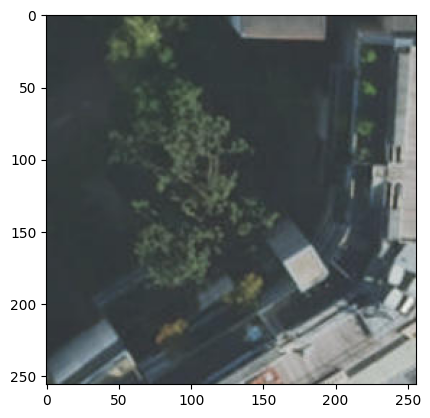

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO


img = Image.open(BytesIO(tile.read()))

# Display the image
plt.imshow(img)
plt.show()

In [7]:
import mercantile

tilematrix=20
row=363572
column=571896
x, y, z = 8738, 5624, 14
x, y, z = column, row, tilematrix

# Convert to latitude and longitude
lnglat = mercantile.ul(x, y, z)

# Print the latitude and longitude
print(f'Longitude: {lnglat.lng}, Latitude: {lnglat.lat}')

bounds = mercantile.xy_bounds(x, y, z)
print(bounds)




Longitude: 16.34490966796875, Latitude: 48.21277754010285
Bbox(left=1819507.0213003345, bottom=6142288.50042605, right=1819545.239814477, top=6142326.718940193)


AttributeError: 'Bbox' object has no attribute 'east'

In [21]:
# -20037508.3428 20037508.3428
import math

# Example ScaleDenominator at zoom level 0
scale_denominator_level_0 = 559082264.0287178

# ScaleDenominator at the desired zoom level
scale_denominator = 279541132.0143589

# Calculate the zoom level
zoom_level = round(math.log(scale_denominator_level_0 / scale_denominator, 2))


zoom = 0
bbox = (-0.5, 51.0, 0.0, 51.5)

tiles = mercantile.tiles(bbox[0], bbox[1], bbox[2], bbox[3], zooms=zoom)
list(tiles)

[Tile(x=0, y=0, z=0)]

In [ ]:
# <TileMatrix>
# <ows:Identifier>0</ows:Identifier>
# <ScaleDenominator>559082264.029</ScaleDenominator>
# <TopLeftCorner>-20037508.3428 20037508.3428</TopLeftCorner>
# <TileWidth>256</TileWidth>
# <TileHeight>256</TileHeight>
# <MatrixWidth>1</MatrixWidth>
# <MatrixHeight>1</MatrixHeight>
# </TileMatrix>

In [32]:
import mercantile

# Define the bounding box (min_lng, min_lat, max_lng, max_lat)
bbox = (16.083, 48, 16.704, 48.4)

# Define the zoom level
zoom = 10

# Calculate the tile indices for the bounding box corners
tiles = list(mercantile.tiles(bbox[0], bbox[1], bbox[2], bbox[3], zooms=zoom))

# Print the tiles
for tile in tiles:
    print(f'Zoom level: {tile.z}, x: {tile.x}, y: {tile.y}')
    print(f"https://mapsneu.wien.gv.at/wmts/lb/farbe/google3857/{tile.z}/{tile.y}/{tile.x}.jpeg")


# https://mapsneu.wien.gv.at/wmts/lb/farbe/google3857/10/354/557.jpeg


    # tilematrix='14',
    # row=5679,
    # column=8934,

Zoom level: 10, x: 557, y: 354
https://mapsneu.wien.gv.at/wmts/lb/farbe/google3857/10/354/557.jpeg
Zoom level: 10, x: 557, y: 355
https://mapsneu.wien.gv.at/wmts/lb/farbe/google3857/10/355/557.jpeg
Zoom level: 10, x: 558, y: 354
https://mapsneu.wien.gv.at/wmts/lb/farbe/google3857/10/354/558.jpeg
Zoom level: 10, x: 558, y: 355
https://mapsneu.wien.gv.at/wmts/lb/farbe/google3857/10/355/558.jpeg
Zoom level: 10, x: 559, y: 354
https://mapsneu.wien.gv.at/wmts/lb/farbe/google3857/10/354/559.jpeg
Zoom level: 10, x: 559, y: 355
https://mapsneu.wien.gv.at/wmts/lb/farbe/google3857/10/355/559.jpeg
